In [4]:
#Ques-1


import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import scipy.stats as stats
import copy

In [5]:
#Ques-2


Insu_df=pd.read_csv('Insurance.csv')
Insu_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [16]:
#Ques-3

#a.	Shape of the data  
Insu_df.shape

(1338, 7)

In [17]:
#b.	Data type of each attribute  
Insu_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
#c.	Checking the presence of missing values  
Insu_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [38]:
#d 5 point summary of numerical attributes  
Insu_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [29]:
#e.	Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

Insu_df[['bmi','age','charges']].describe()

,bmi,age,charges
count,1338.000000,1338.000000,1338.000000
mean,30.663397,39.207025,13270.422265
std,6.098187,14.049960,12110.011237
min,15.960000,18.000000,1121.873900
25%,26.296250,27.000000,4740.287150
50%,30.400000,39.000000,9382.033000
75%,34.693750,51.000000,16639.912515
max,53.130000,64.000000,63770.428010


C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

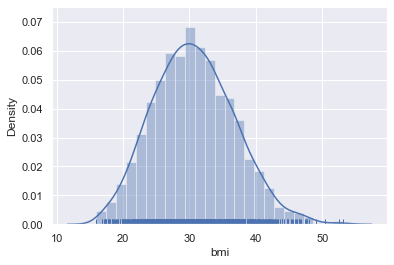

In [47]:
sns.distplot(Insu_df['bmi'], kde=True, rug=True)

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

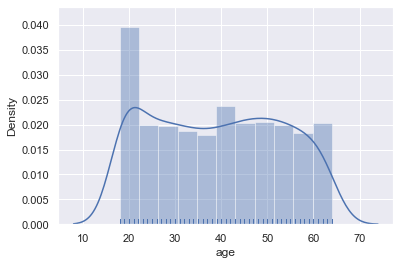

In [45]:
sns.distplot(Insu_df['age'], kde=True, rug=True)

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

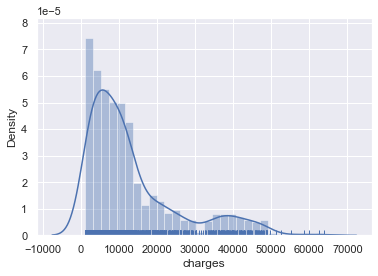

In [46]:
sns.distplot(Insu_df['charges'], kde=True, rug=True)

In [48]:
#f.	Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns  
Skewness = pd.DataFrame({'Skewness' : [stats.skew(Insu_df.bmi),
                                       stats.skew(Insu_df.age),stats.skew(Insu_df.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

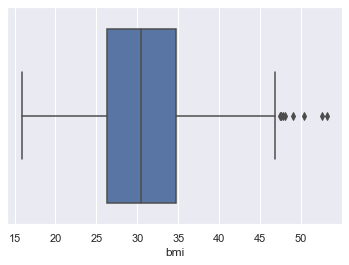

In [35]:
#g.	Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 
sns.set(style="darkgrid")
sns.boxplot(Insu_df["bmi"])

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

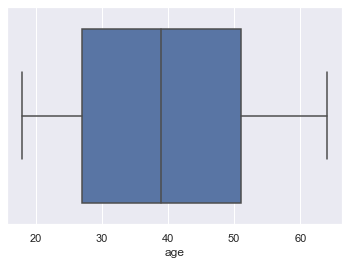

In [36]:
sns.boxplot(Insu_df["age"])

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

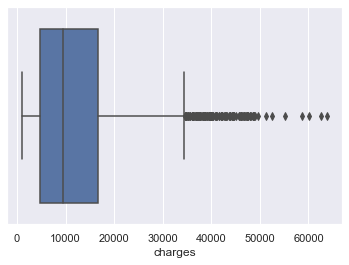

In [37]:
sns.boxplot(Insu_df["charges"])

In [56]:
iqr_bmi = np.subtract(*np.percentile(Insu_df['bmi'], [75, 25]))
print("Inter Quartile Rance for bmi is",iqr_bmi)
iqr_age = np.subtract(*np.percentile(Insu_df['age'], [75, 25]))
print("Inter Quartile Rance for age is",iqr_age)
iqr_charges = np.subtract(*np.percentile(Insu_df['charges'], [75, 25]))
print("Inter Quartile Rance for charges is",iqr_charges)

Inter Quartile Rance for bmi is 8.3975
Inter Quartile Rance for age is 24.0
Inter Quartile Rance for charges is 11899.625365


In [57]:
# identify outliers for bmi

q25 = np.percentile(Insu_df['bmi'], 25)
q75 = np.percentile(Insu_df['bmi'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower   = q25 - cut_off
upper   = q75 + cut_off
outliers = [x for x in Insu_df['bmi'] if x < lower or x > upper]
print('The total outliers for bmi out of 1338 records are %d' % len(outliers))

The total outliers for bmi out of 1338 records are 9


In [58]:
# identify outliers for age

q25 = np.percentile(Insu_df['age'], 25)
q75 = np.percentile(Insu_df['age'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower   = q25 - cut_off
upper   = q75 + cut_off
outliers = [x for x in Insu_df['age'] if x < lower or x > upper]
print('The total outliers for age out of 1338 records are %d' % len(outliers))

The total outliers for age out of 1338 records are 0


In [59]:
# identify outliers for charges

q25 = np.percentile(Insu_df['charges'], 25)
q75 = np.percentile(Insu_df['charges'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower   = q25 - cut_off
upper   = q75 + cut_off
outliers = [x for x in Insu_df['charges'] if x < lower or x > upper]
print('The total outliers for charges out of 1338 records are %d' % len(outliers))

The total outliers for charges out of 1338 records are 139


<AxesSubplot:xlabel='children', ylabel='charges'>

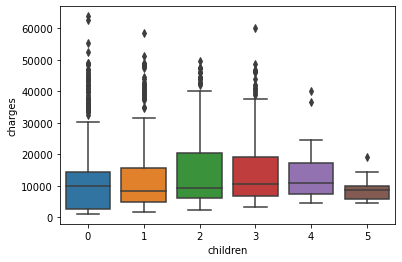

In [21]:
#h.	Distribution of categorical columns (include children)  


#sns.histplot(x='children', y='charges', data= Insu_df,kde=True)
sns.boxplot(x='children', y='charges', data= Insu_df)


<AxesSubplot:xlabel='sex', ylabel='charges'>

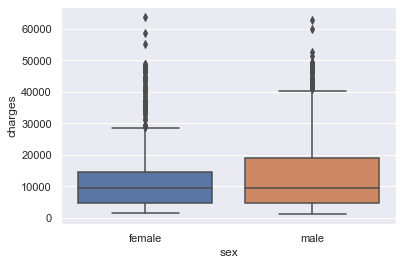

In [61]:
sns.boxplot(x='sex', y='charges', data= Insu_df)

<AxesSubplot:xlabel='region', ylabel='charges'>

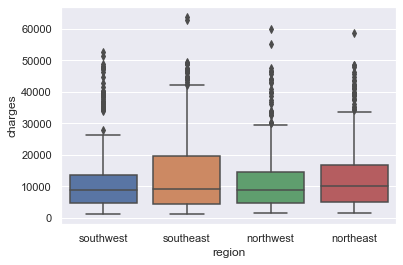

In [62]:
sns.boxplot(x='region', y='charges', data= Insu_df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

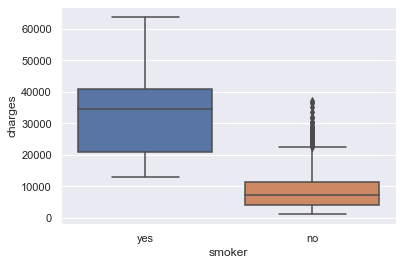

In [63]:
sns.boxplot(x='smoker', y='charges', data= Insu_df)

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

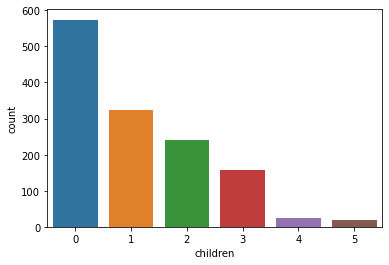

In [22]:
sns.countplot(Insu_df['children'])

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

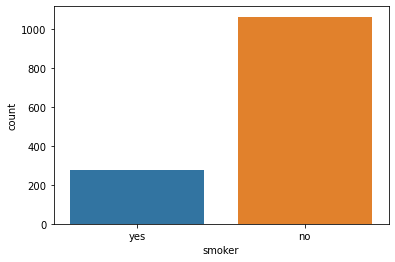

In [25]:
sns.countplot(Insu_df['smoker'])

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

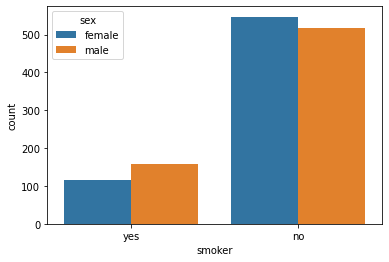

In [23]:
sns.countplot(Insu_df['smoker'],hue = Insu_df['sex'])

In [26]:
#i.	Pair plot that includes all the columns of the data frame  


#Encoding the variables before doing a pairplot because pairplot ignores string datatype
insu_df_encoded = copy.deepcopy(Insu_df)
insu_df_encoded.loc[:,['sex', 'smoker', 'region']] = Insu_df.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

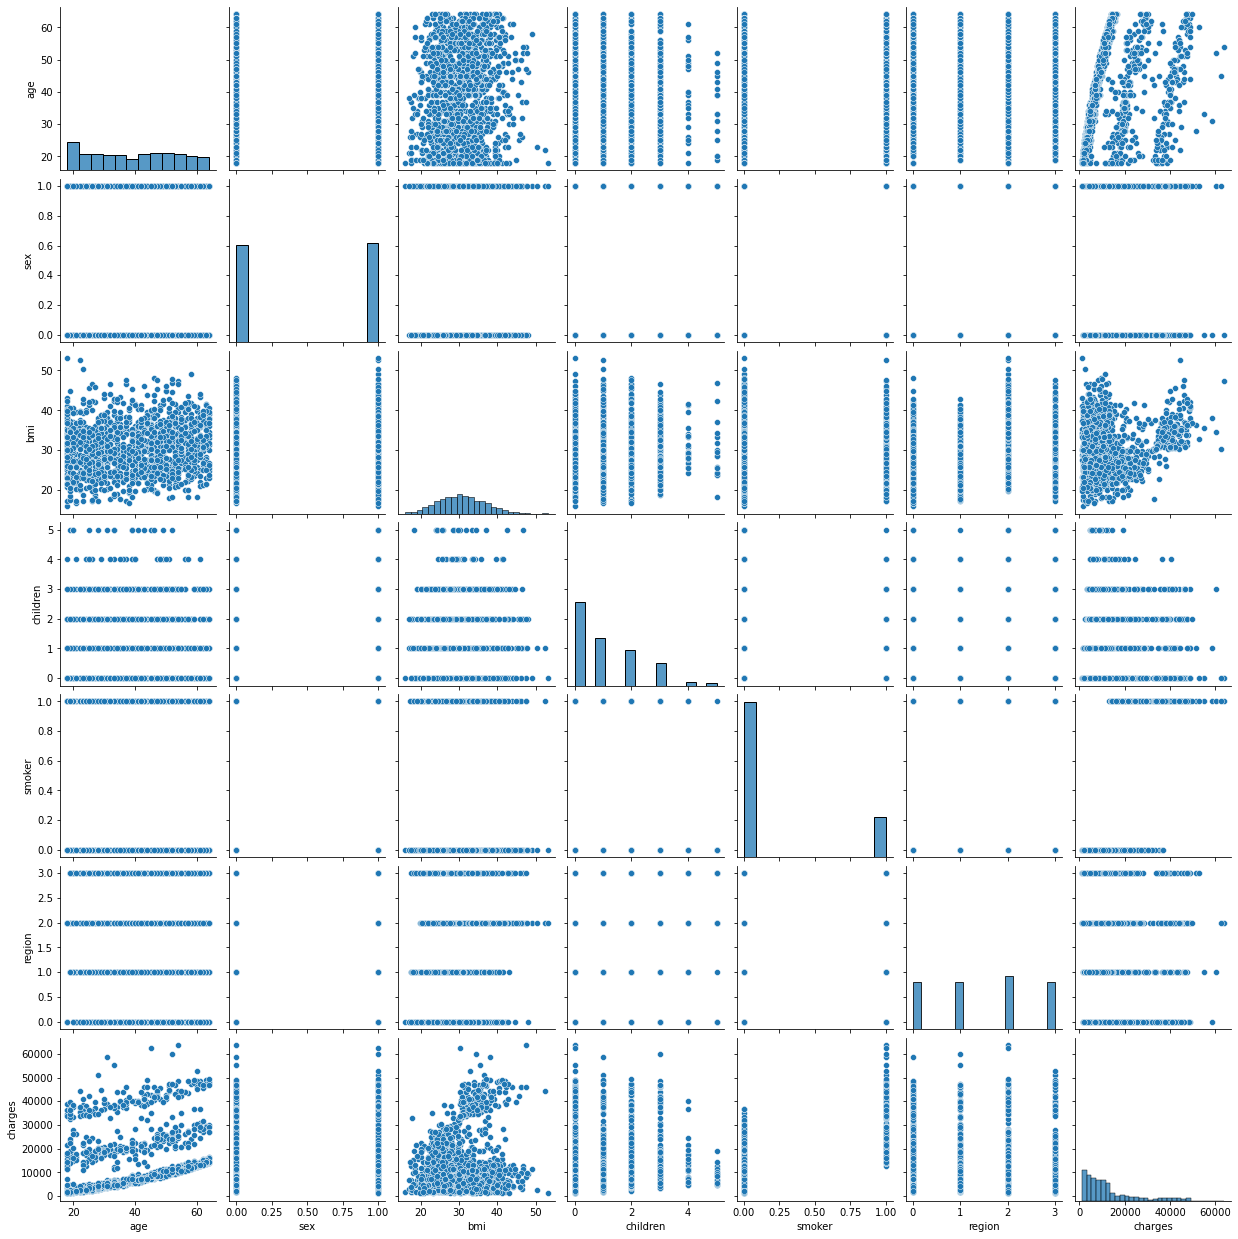

In [28]:
sns.pairplot(insu_df_encoded)
plt.show()

In [7]:
#Ques-4


#a)	Do charges of people who smoke differ significantly from the people who don't?  

Insu_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


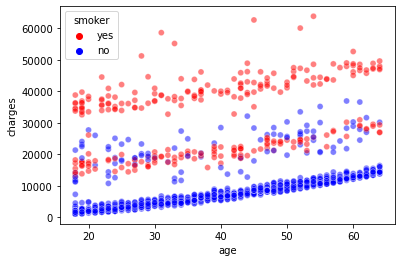

In [9]:
sns.scatterplot(Insu_df.age,Insu_df.charges,hue=Insu_df.smoker,palette= ['red','blue'] ,alpha=0.5)
plt.show()

In [10]:
#Applying T-test to determine the impact of smoking on the charges.

Ho = "Charges of smokers and non-smokers are the same"   
Ha = "Charges of smokers and non-smokers are not the same"

# Selecting charges corresponding to smokers as an array
x = np.array(Insu_df[Insu_df.smoker == 'yes'].charges) 

# Selecting charges corresponding to non-smokers as an array
y = np.array(Insu_df[Insu_df.smoker == 'no'].charges)

#Performing an Independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

#Rejecting the null hypothesis as the p_value is lesser than 0.05. 
#This tells us that the paid charges by the smokers and non-smokers is different.
#Smokers pay higher charges in comparison to the non-smokers.

8.271435842179102e-283


In [12]:
#b Does bmi of males differ significantly from that of females? 

Insu_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


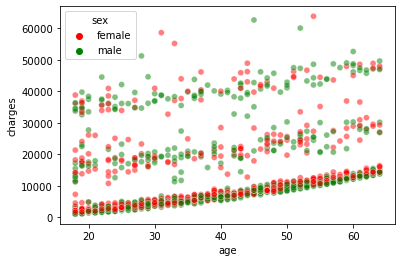

In [16]:
sns.scatterplot(Insu_df.age,Insu_df.charges,hue=Insu_df.sex,palette= ['red','green'] ,alpha=0.5 )
plt.show()

In [14]:
#Applying T-test to determine the impact of Gender on the bmi.
Ho = "Gender has no impact on bmi"   
Ha = "Gender has an impact on bmi"   

x = np.array(Insu_df[Insu_df.sex == 'male'].bmi)  
y = np.array(Insu_df[Insu_df.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

#Accepting the nullhypothesis as pvalue is greater than 0.05. Hence we can say that Gender has no impact on the bmi.

0.08997637178984932


In [7]:
#c Is the proportion of smokers significantly different in different genders?

# We will perform Chi_square test to check if the proportion of smokers differs as per gender.
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"  

crosstab = pd.crosstab(Insu_df['sex'],Insu_df['smoker']) 
chi, p_value, dof, 
expected =  stats.chi2_contingency(crosstab)
print(p_value)

0.006548143503580696


In [9]:
#d. Is the distribution of bmi across women with no children, one child and two children, the same ?

# Applying anova test to check the proportion as there are more than two cases involved
Ho = "No. of children has no effect on the bmi"   
Ha = "No. of children has an effect on the bmi"   

newdf = copy.deepcopy(Insu_df[Insu_df['sex'] == 'female'])

zero = newdf[newdf.children == 0]['bmi']
one = newdf[newdf.children == 1]['bmi']
two = newdf[newdf.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841
